# Библиотеки

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_training
import plotting_utils

In [2]:
# run this function if you need to generate a csv data set from scratch
# data_loader.generate_csv_dataset()

In [2]:
# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_8192.csv', 
#                                     y_path='data/y_labels_8192.csv',
#                                     ID_path='data/IDs_8192.csv')

X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_16384.csv', 
                                    y_path='data/y_labels_16384.csv',
                                    ID_path='data/IDs_16384.csv')

data loaded in 0.03903532028198242ms
          0         1         2         3         4         5         6  \
0 -1.340575  0.393895  0.510593  0.947523  1.287542  0.769594  0.485688   
1 -1.243292  0.477580  0.311239  1.505344  1.340594  0.734561  1.073940   
2 -1.169875  0.944631  0.578307  0.843000  0.598247  0.855154  1.156340   
3 -1.042818  0.879224  0.660238  0.625166  0.616873  1.073396  1.126773   
4 -1.463665  0.603054  0.672596  1.383099  1.380855  0.973734  0.541040   

          7         8         9  ...        70        71        72        73  \
0  1.005057 -0.855131 -0.669410  ... -0.829806 -1.044211 -0.512874 -0.930129   
1  0.647343 -0.804560 -0.059994  ... -0.970244 -0.836729 -0.711071 -0.862514   
2  0.892952 -0.629255 -1.242833  ... -0.711490 -1.127856 -1.101480 -1.082668   
3  0.020074 -0.781279 -0.973796  ... -0.233650 -0.878056 -0.314677 -0.866326   
4  0.878725 -0.145717 -1.042644  ... -1.234997 -1.344177 -0.577788 -0.916411   

         74        75        76

In [26]:
ID['0'].unique()    # actors

array([22,  9, 18,  6, 24,  3, 21, 12, 14, 15,  5, 20, 23,  4,  8, 13, 11,
       10,  7,  2, 19,  1, 17, 16])

In [3]:
group_members= data_loader.get_k_fold_group_member()


X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
print(len(X_k_folds))

5


## SVM with Linear kernel

### Train & evaluate function

### Grid Search (C)

100%|██████████| 5/5 [00:00<00:00,  8.82it/s]


UAR = 0.452


100%|██████████| 5/5 [00:00<00:00,  8.96it/s]


UAR = 0.451


100%|██████████| 5/5 [00:00<00:00,  9.13it/s]


UAR = 0.443


100%|██████████| 5/5 [00:00<00:00,  9.27it/s]


UAR = 0.445


100%|██████████| 5/5 [00:00<00:00,  8.22it/s]


UAR = 0.424


100%|██████████| 5/5 [00:00<00:00,  6.93it/s]


UAR = 0.419


100%|██████████| 5/5 [00:00<00:00,  5.17it/s]


UAR = 0.419


100%|██████████| 5/5 [00:01<00:00,  3.87it/s]


UAR = 0.422


100%|██████████| 5/5 [00:01<00:00,  2.95it/s]


UAR = 0.415


100%|██████████| 5/5 [00:02<00:00,  2.35it/s]


UAR = 0.404


100%|██████████| 5/5 [00:02<00:00,  1.94it/s]


UAR = 0.402


100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

UAR = 0.407


Text(0, 0.5, 'UAR')

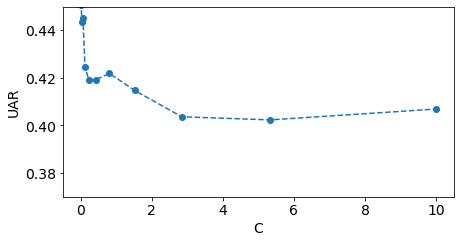

In [5]:
# C = [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1.0, 2.0, 3.0]
C = np.logspace(-2, 1, 12, endpoint=True)
UAR_list = []
UAR_best = 0
for val_C in C:
    model = SVC(kernel = 'linear', C=val_C)
    UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
    if UAR_best<UAR:
        UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
    UAR_list.append(UAR)

fig,ax=plt.subplots(figsize=(7,3.5))
plt.rcParams.update({'font.size': 14})
plt.plot(C,UAR_list, marker='o', linestyle='dashed',)
plt.ylim([0.37, 0.45])
plt.xlabel('C')
plt.ylabel('UAR')

In [32]:
10**(C_best)

1.0508587552139304

## Results and confusion matrix

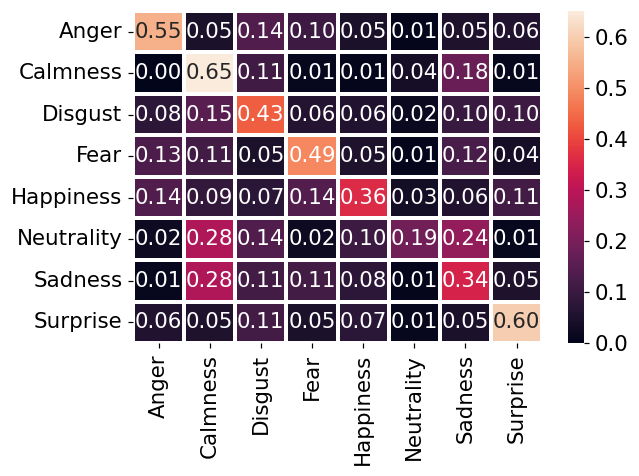

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [6]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)

# SVM (version 2)

In [10]:
# C = [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1.0, 2.0, 3.0, 10.0]
C = np.logspace(-2, 0.5, 10, endpoint=True)
UAR_list = []
UAR_best = 0
C_best = 0
for val_C in C:
    model = SVC(kernel = 'linear', C=val_C, decision_function_shape='ovr',break_ties=True)
    UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
    if UAR_best<UAR:
        UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te        
        C_best = val_C
    UAR_list.append(UAR)

print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.6f}')

100%|██████████| 5/5 [00:00<00:00,  8.93it/s]


UAR = 0.452


100%|██████████| 5/5 [00:00<00:00,  9.11it/s]


UAR = 0.452


100%|██████████| 5/5 [00:00<00:00,  8.90it/s]


UAR = 0.449


100%|██████████| 5/5 [00:00<00:00,  8.11it/s]


UAR = 0.447


100%|██████████| 5/5 [00:00<00:00,  7.49it/s]


UAR = 0.430


100%|██████████| 5/5 [00:00<00:00,  6.38it/s]


UAR = 0.417


100%|██████████| 5/5 [00:00<00:00,  5.06it/s]


UAR = 0.419


100%|██████████| 5/5 [00:01<00:00,  3.60it/s]


UAR = 0.427


100%|██████████| 5/5 [00:01<00:00,  2.69it/s]


UAR = 0.423


100%|██████████| 5/5 [00:02<00:00,  2.27it/s]

UAR = 0.408
UAR_best = 0.452, C_best = 0.018957


## Plot GridSearch results

UAR_best = 0.452, C_best = 0.019


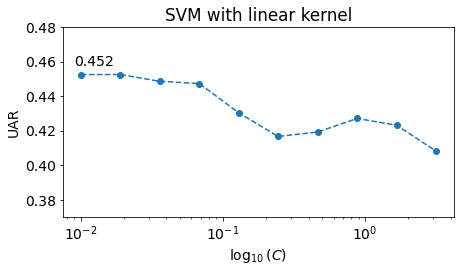

In [11]:
fig,ax=plt.subplots(figsize=(7,3.5))
plt.rcParams.update({'font.size': 14})
# plt.plot(C,UAR_list, marker='o', linestyle='dashed',)
plt.semilogx(C,UAR_list, marker='o', linestyle='dashed',)
plt.ylim([0.37, 0.48])
plt.xlabel('$\log_{10}(C)$')
plt.ylabel('UAR')
plt.text(C_best-0.010, UAR_best+0.005, f'{UAR_best:.3f}')
plt.title('SVM with linear kernel')
print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.3f}')

In [36]:
10**(C_best)

1.0508587552139304

## Results and confusion matrix

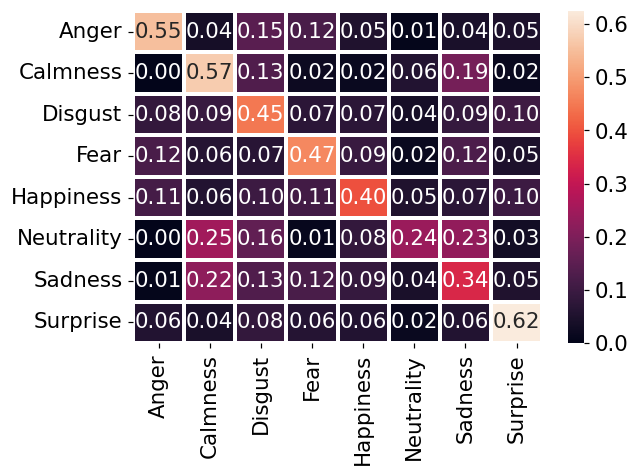

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [9]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)